#Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, classification_report

# Data Loading

In [2]:
link1='https://drive.google.com/file/d/1Mq7UhwpYEu2AqKaZf5FAdrVzErM6nDDz/view?usp=drive_link'
path1 = 'https://drive.google.com/uc?export=download&id='+link1.split('/')[-2]
df = pd.read_csv(path1)
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [3]:
df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


# Data Cleaning

In [6]:
# check dữ liệu trùng lặp
df['EmployeeNumber'].duplicated().sum()

0

In [7]:
#check dữ liệu null
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [8]:
#Loại bỏ cột không cần thiết
df.drop(columns = ['EmployeeCount','StandardHours','EmployeeNumber','Over18'],inplace = True)
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,...,3,3,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,...,3,1,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,...,4,2,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,...,3,4,0,17,3,2,9,6,0,8


# Data Visualization

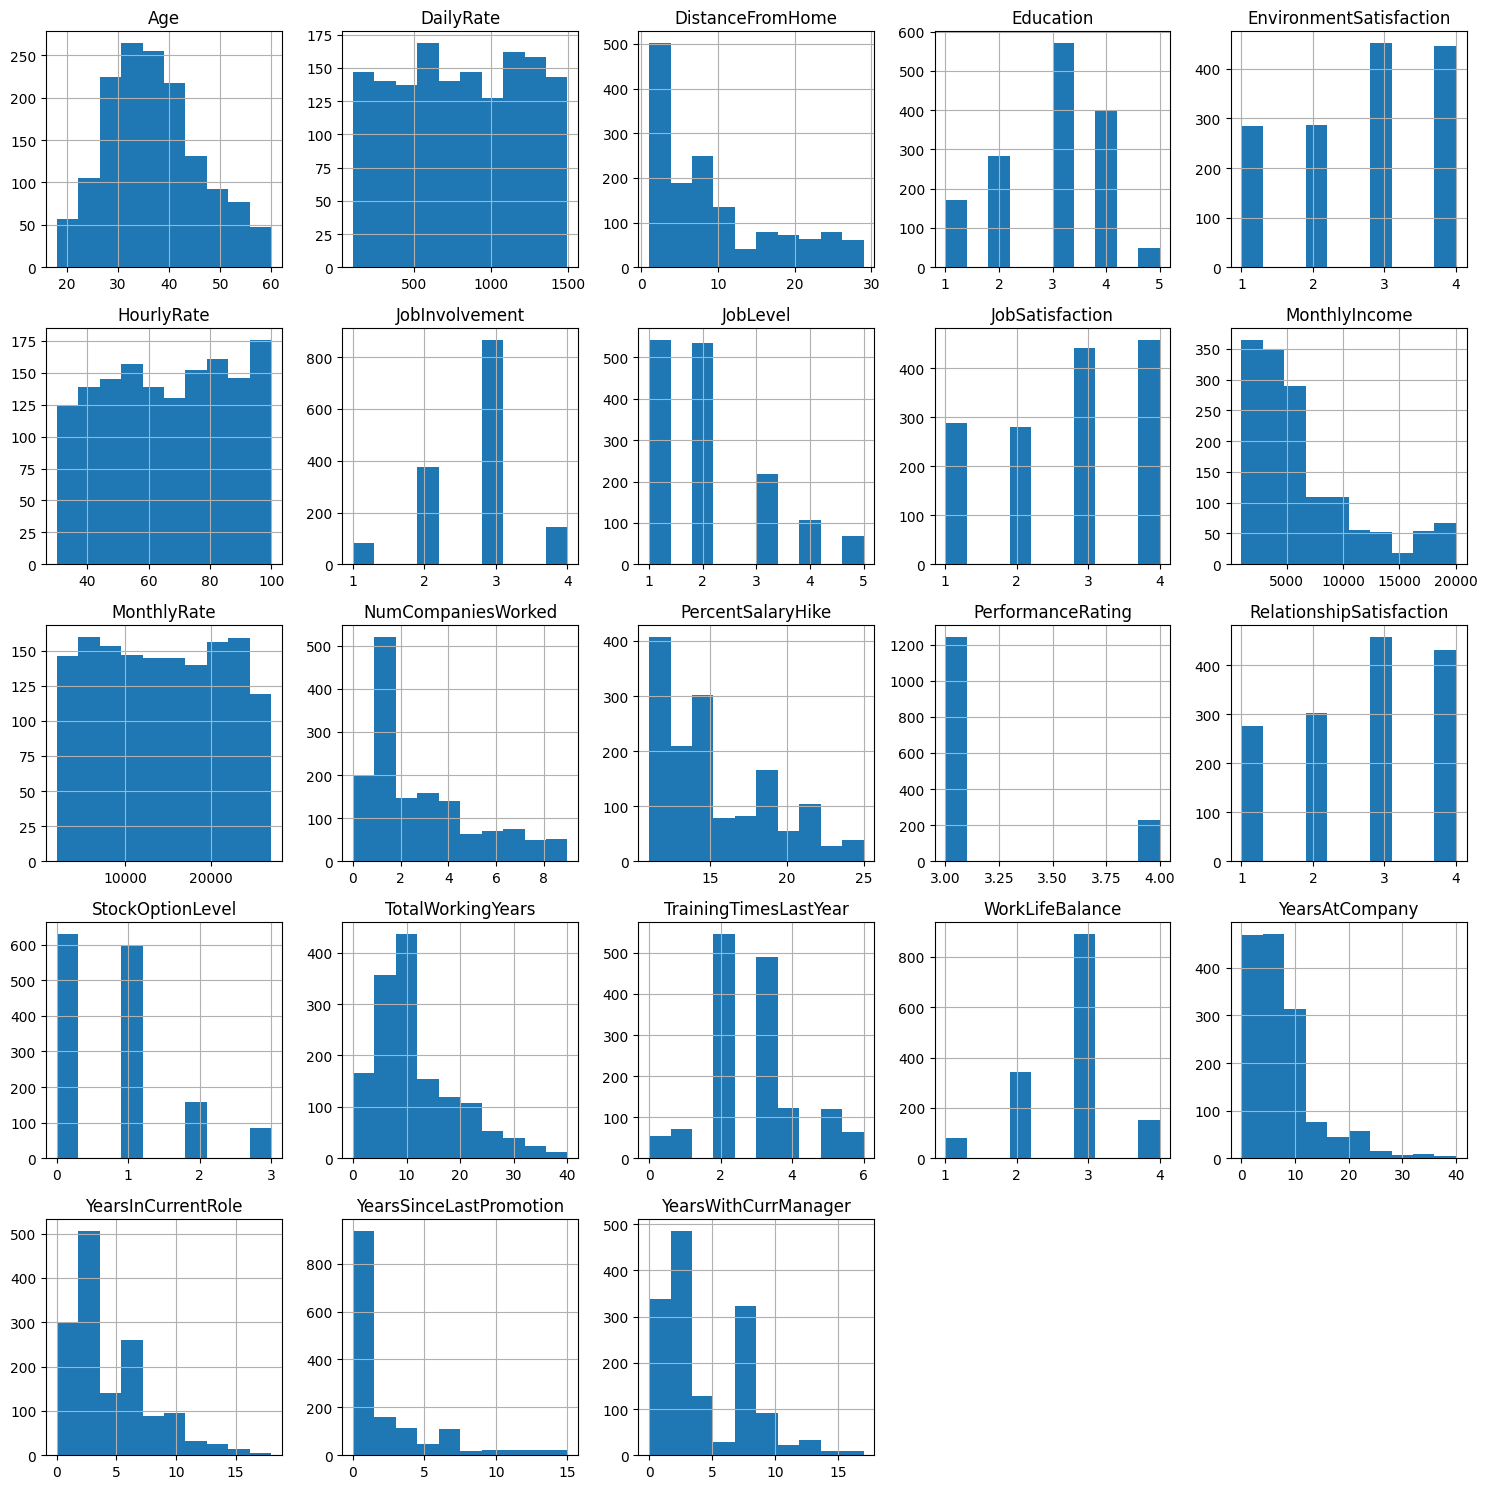

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 640x480 with 0 Axes>

In [9]:
df.hist(figsize=(15,15))
plt.tight_layout()
plt.show()
plt.savefig('my_plot.png', dpi=4000)
from google.colab import files
files.download('my_plot.png')




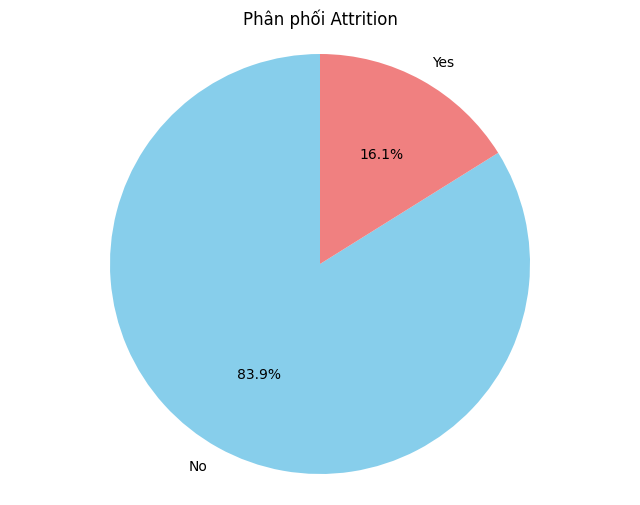

In [10]:
attrition_counts = df['Attrition'].value_counts()
attrition_percentages = (attrition_counts / len(df)) * 100
plt.figure(figsize=(8, 6))
plt.pie(attrition_percentages, labels=attrition_percentages.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.axis('equal')
plt.title('Phân phối Attrition')
plt.show()




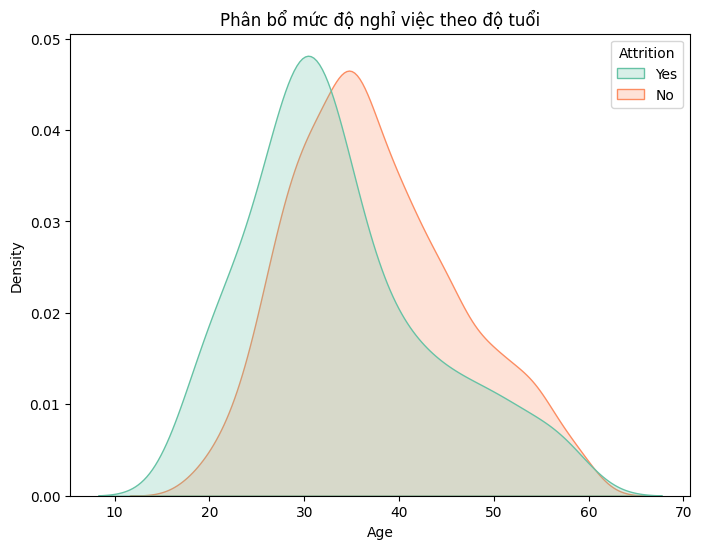

In [11]:
plt.figure(figsize=(8, 6))
sns.kdeplot(data=df, x='Age', hue='Attrition', common_norm=False, palette='Set2', fill=True)
plt.title('Phân bổ mức độ nghỉ việc theo độ tuổi')
plt.show()

In [12]:
df['Age'].describe()

count    1470.000000
mean       36.923810
std         9.135373
min        18.000000
25%        30.000000
50%        36.000000
75%        43.000000
max        60.000000
Name: Age, dtype: float64

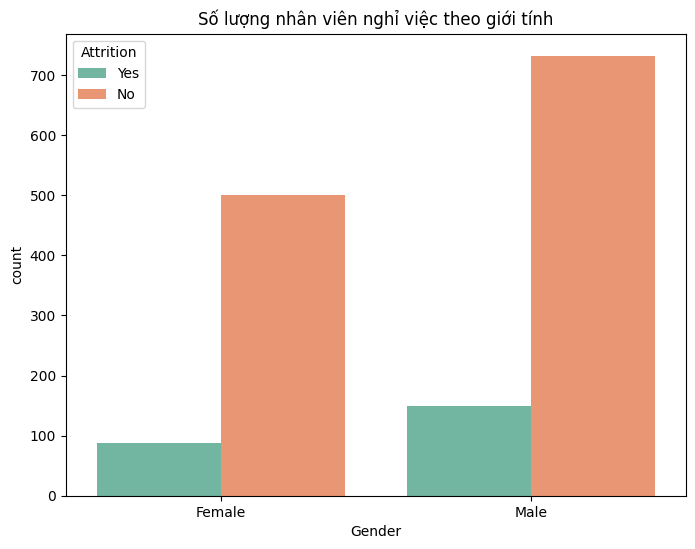

In [13]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', hue='Attrition', data=df, palette='Set2')
plt.title('Số lượng nhân viên nghỉ việc theo giới tính')
plt.show()

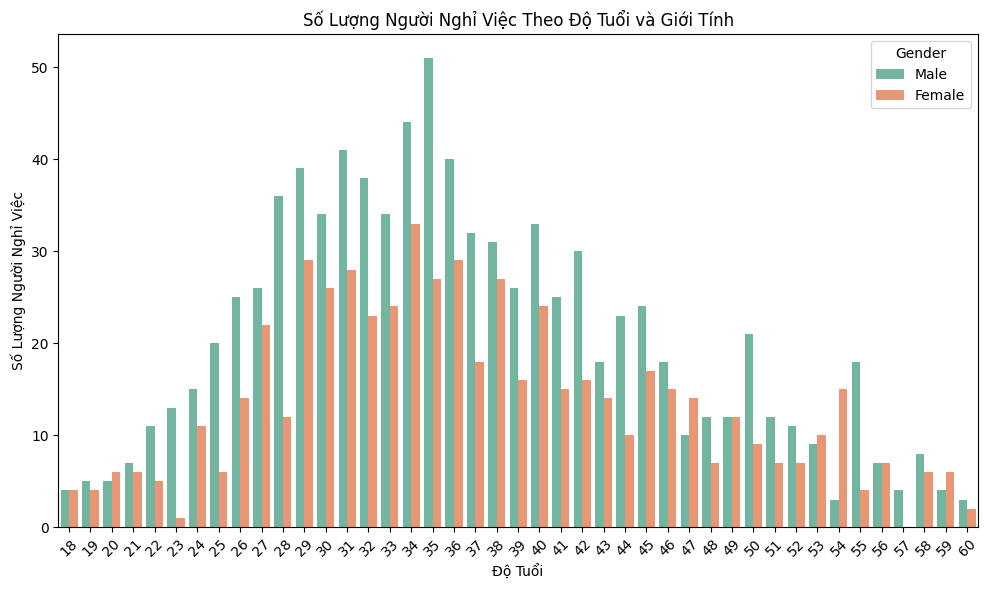

In [14]:
# Đặt kích thước biểu đồ
plt.figure(figsize=(10, 6))

# Vẽ biểu đồ
sns.countplot(data=df, x='Age', hue='Gender', hue_order=['Male', 'Female'], palette='Set2')

# Đặt tên cho trục x và y, và tiêu đề biểu đồ
plt.xlabel('Độ Tuổi')
plt.ylabel('Số Lượng Người Nghỉ Việc')
plt.title('Số Lượng Người Nghỉ Việc Theo Độ Tuổi và Giới Tính')
plt.xticks(rotation=45)  # Xoay nhãn trục x nếu cần
plt.tight_layout()
plt.show()

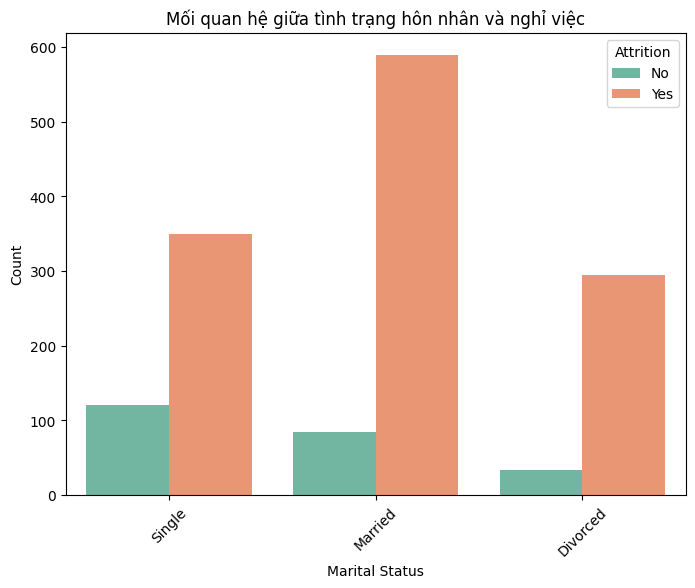

In [15]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='MaritalStatus', hue='Attrition', palette='Set2')
plt.title('Mối quan hệ giữa tình trạng hôn nhân và nghỉ việc')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Attrition', loc='upper right', labels=['No', 'Yes'])
plt.show()

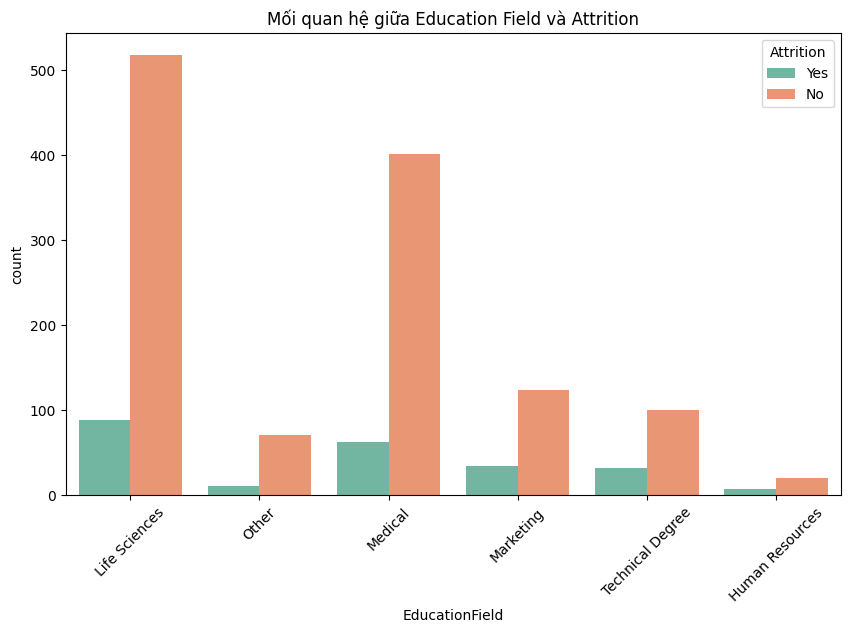

In [16]:
plt.figure(figsize=(10, 6))
sns.countplot(x='EducationField', hue='Attrition', data=df, palette='Set2')
plt.title('Mối quan hệ giữa Education Field và Attrition')
plt.xticks(rotation=45)  # Xoay nhãn trục x nếu cần
plt.show()

<Axes: xlabel='EducationField', ylabel='Count'>

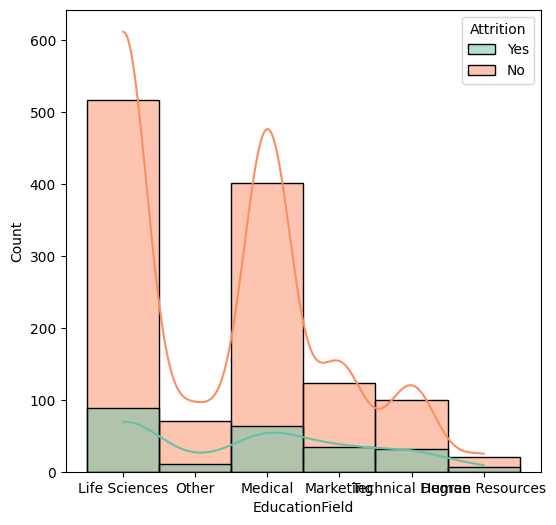

In [17]:
plt.figure(figsize=(13.5,6))
plt.subplot(1,2,1)
sns.histplot(x='EducationField', hue='Attrition', data=df, kde=True,palette='Set2')

In [18]:
df['MonthlyIncome'].describe()

count     1470.000000
mean      6502.931293
std       4707.956783
min       1009.000000
25%       2911.000000
50%       4919.000000
75%       8379.000000
max      19999.000000
Name: MonthlyIncome, dtype: float64

<Axes: xlabel='MonthlyIncome', ylabel='Count'>

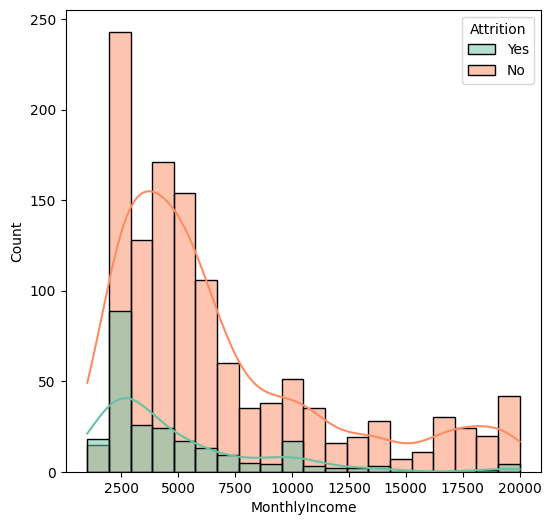

In [19]:
plt.figure(figsize=(13.5,6))
plt.subplot(1,2,1)
sns.histplot(x='MonthlyIncome', hue='Attrition', data=df, kde=True,palette='Set2')



In [20]:
df.Department.value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

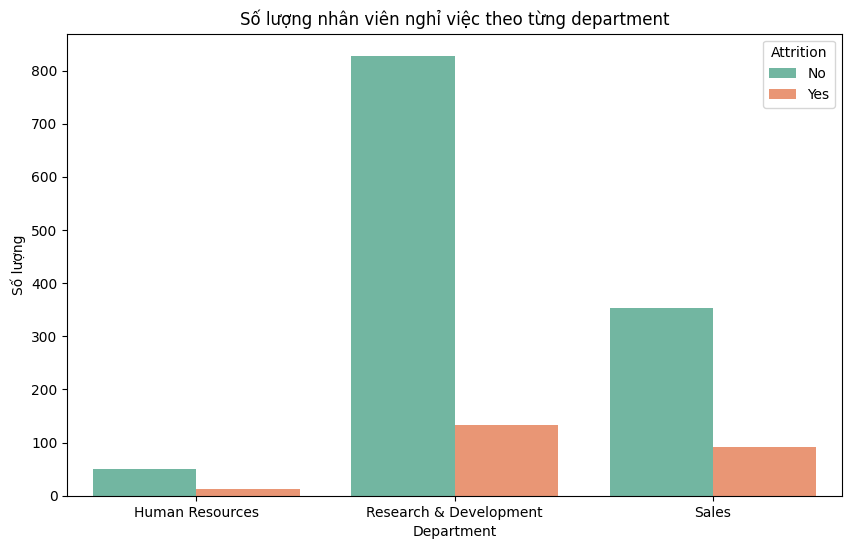

In [21]:
attrition_counts = df.groupby(['Department', 'Attrition']).size().reset_index(name='Counts')

# Vẽ biểu đồ cột
plt.figure(figsize=(10, 6))
sns.barplot(x='Department', y='Counts', hue='Attrition', data=attrition_counts, palette='Set2' )

# Đặt tiêu đề và nhãn cho biểu đồ
plt.title("Số lượng nhân viên nghỉ việc theo từng department")
plt.xlabel("Department")
plt.ylabel("Số lượng")

# Hiển thị biểu đồ
plt.show()

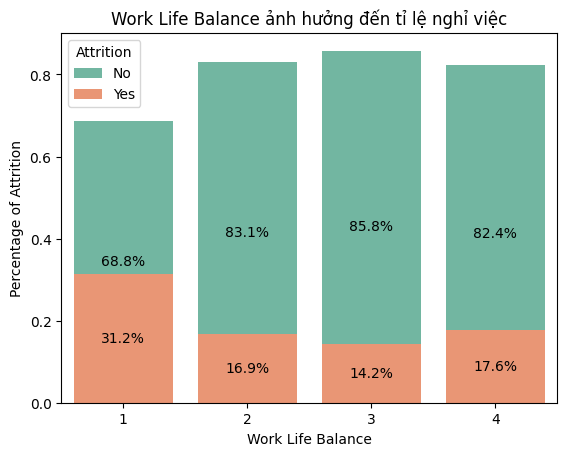

In [22]:
grouped = df.groupby(["WorkLifeBalance", "Attrition"]).size().reset_index(name="count")
grouped["percentage"] = grouped["count"] / grouped.groupby("WorkLifeBalance")["count"].transform("sum")

ax = sns.barplot(x="WorkLifeBalance", y="percentage", hue="Attrition", data=grouped, dodge=False, palette="Set2")
plt.xlabel("Work Life Balance")
plt.ylabel("Percentage of Attrition")
plt.title("Work Life Balance ảnh hưởng đến tỉ lệ nghỉ việc")

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, p.get_y() + height / 2, '{:.1f}%'.format(height * 100), ha='center', va='center')

plt.show()

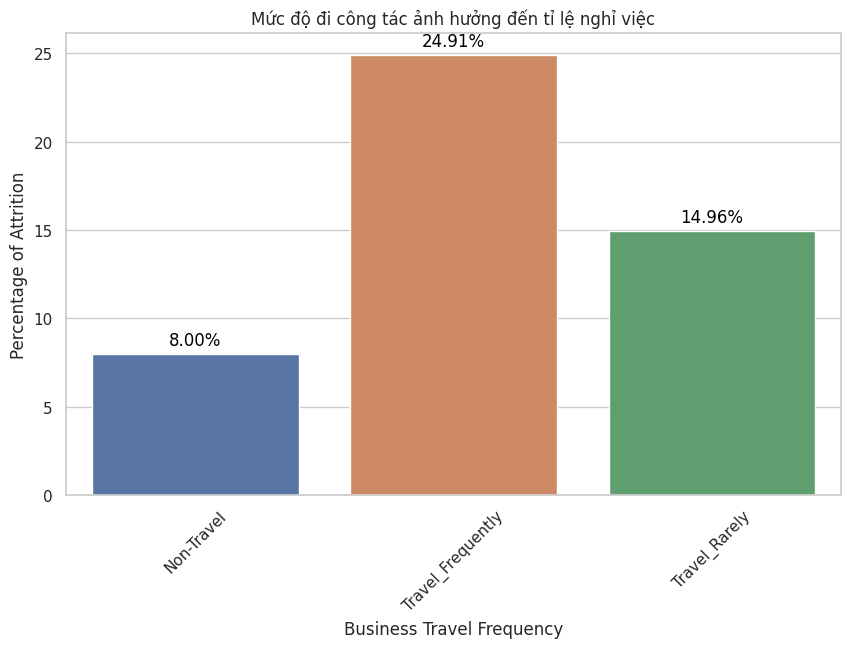

In [23]:
# Group data by BusinessTravel and calculate attrition rates
attrition_by_travel = df.groupby(['BusinessTravel', 'Attrition']).size().unstack()
attrition_by_travel['Attrition Rate'] = attrition_by_travel['Yes'] / (attrition_by_travel['Yes'] + attrition_by_travel['No']) * 100

# Reset index for plotting
attrition_by_travel = attrition_by_travel.reset_index()

color_map = {
    'Travel_Rarely': '#66c2a5',
    'Travel_Frequently': '#fc8d62',
    'Non-Travel': '#8da0cb'}

# Set the style of the plot
sns.set(style="whitegrid")

# Create a bar plot using Seaborn
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='BusinessTravel', y='Attrition Rate', data=attrition_by_travel)

# Add data labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 10), textcoords='offset points')

# Customize the plot
plt.title('Mức độ đi công tác ảnh hưởng đến tỉ lệ nghỉ việc')
plt.xlabel('Business Travel Frequency')
plt.ylabel("Percentage of Attrition")
plt.xticks(rotation=45)  # Rotate x-axis labels if needed

# Show the plot
plt.show()

# Preprocessing Data

In [24]:
#Mã hóa dữ liệu
label_encoder = LabelEncoder()
df['Attrition'] = label_encoder.fit_transform(df['Attrition'])
df['BusinessTravel'] = label_encoder.fit_transform(df['BusinessTravel'])
df['Department'] = label_encoder.fit_transform(df['Department'])
df['EducationField'] = label_encoder.fit_transform(df['EducationField'])
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['JobRole'] = label_encoder.fit_transform(df['JobRole'])
df['MaritalStatus'] = label_encoder.fit_transform(df['MaritalStatus'])
df['OverTime'] = label_encoder.fit_transform(df['OverTime'])
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,1,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,1,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,4,0,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,1,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,884,1,23,2,3,3,1,...,3,3,1,17,3,3,5,2,0,3
1466,39,0,2,613,1,6,1,3,4,1,...,3,1,1,9,5,3,7,7,1,7
1467,27,0,2,155,1,4,3,1,2,1,...,4,2,1,6,0,3,6,2,0,3
1468,49,0,1,1023,2,2,3,3,4,1,...,3,4,0,17,3,2,9,6,0,8


<Axes: >

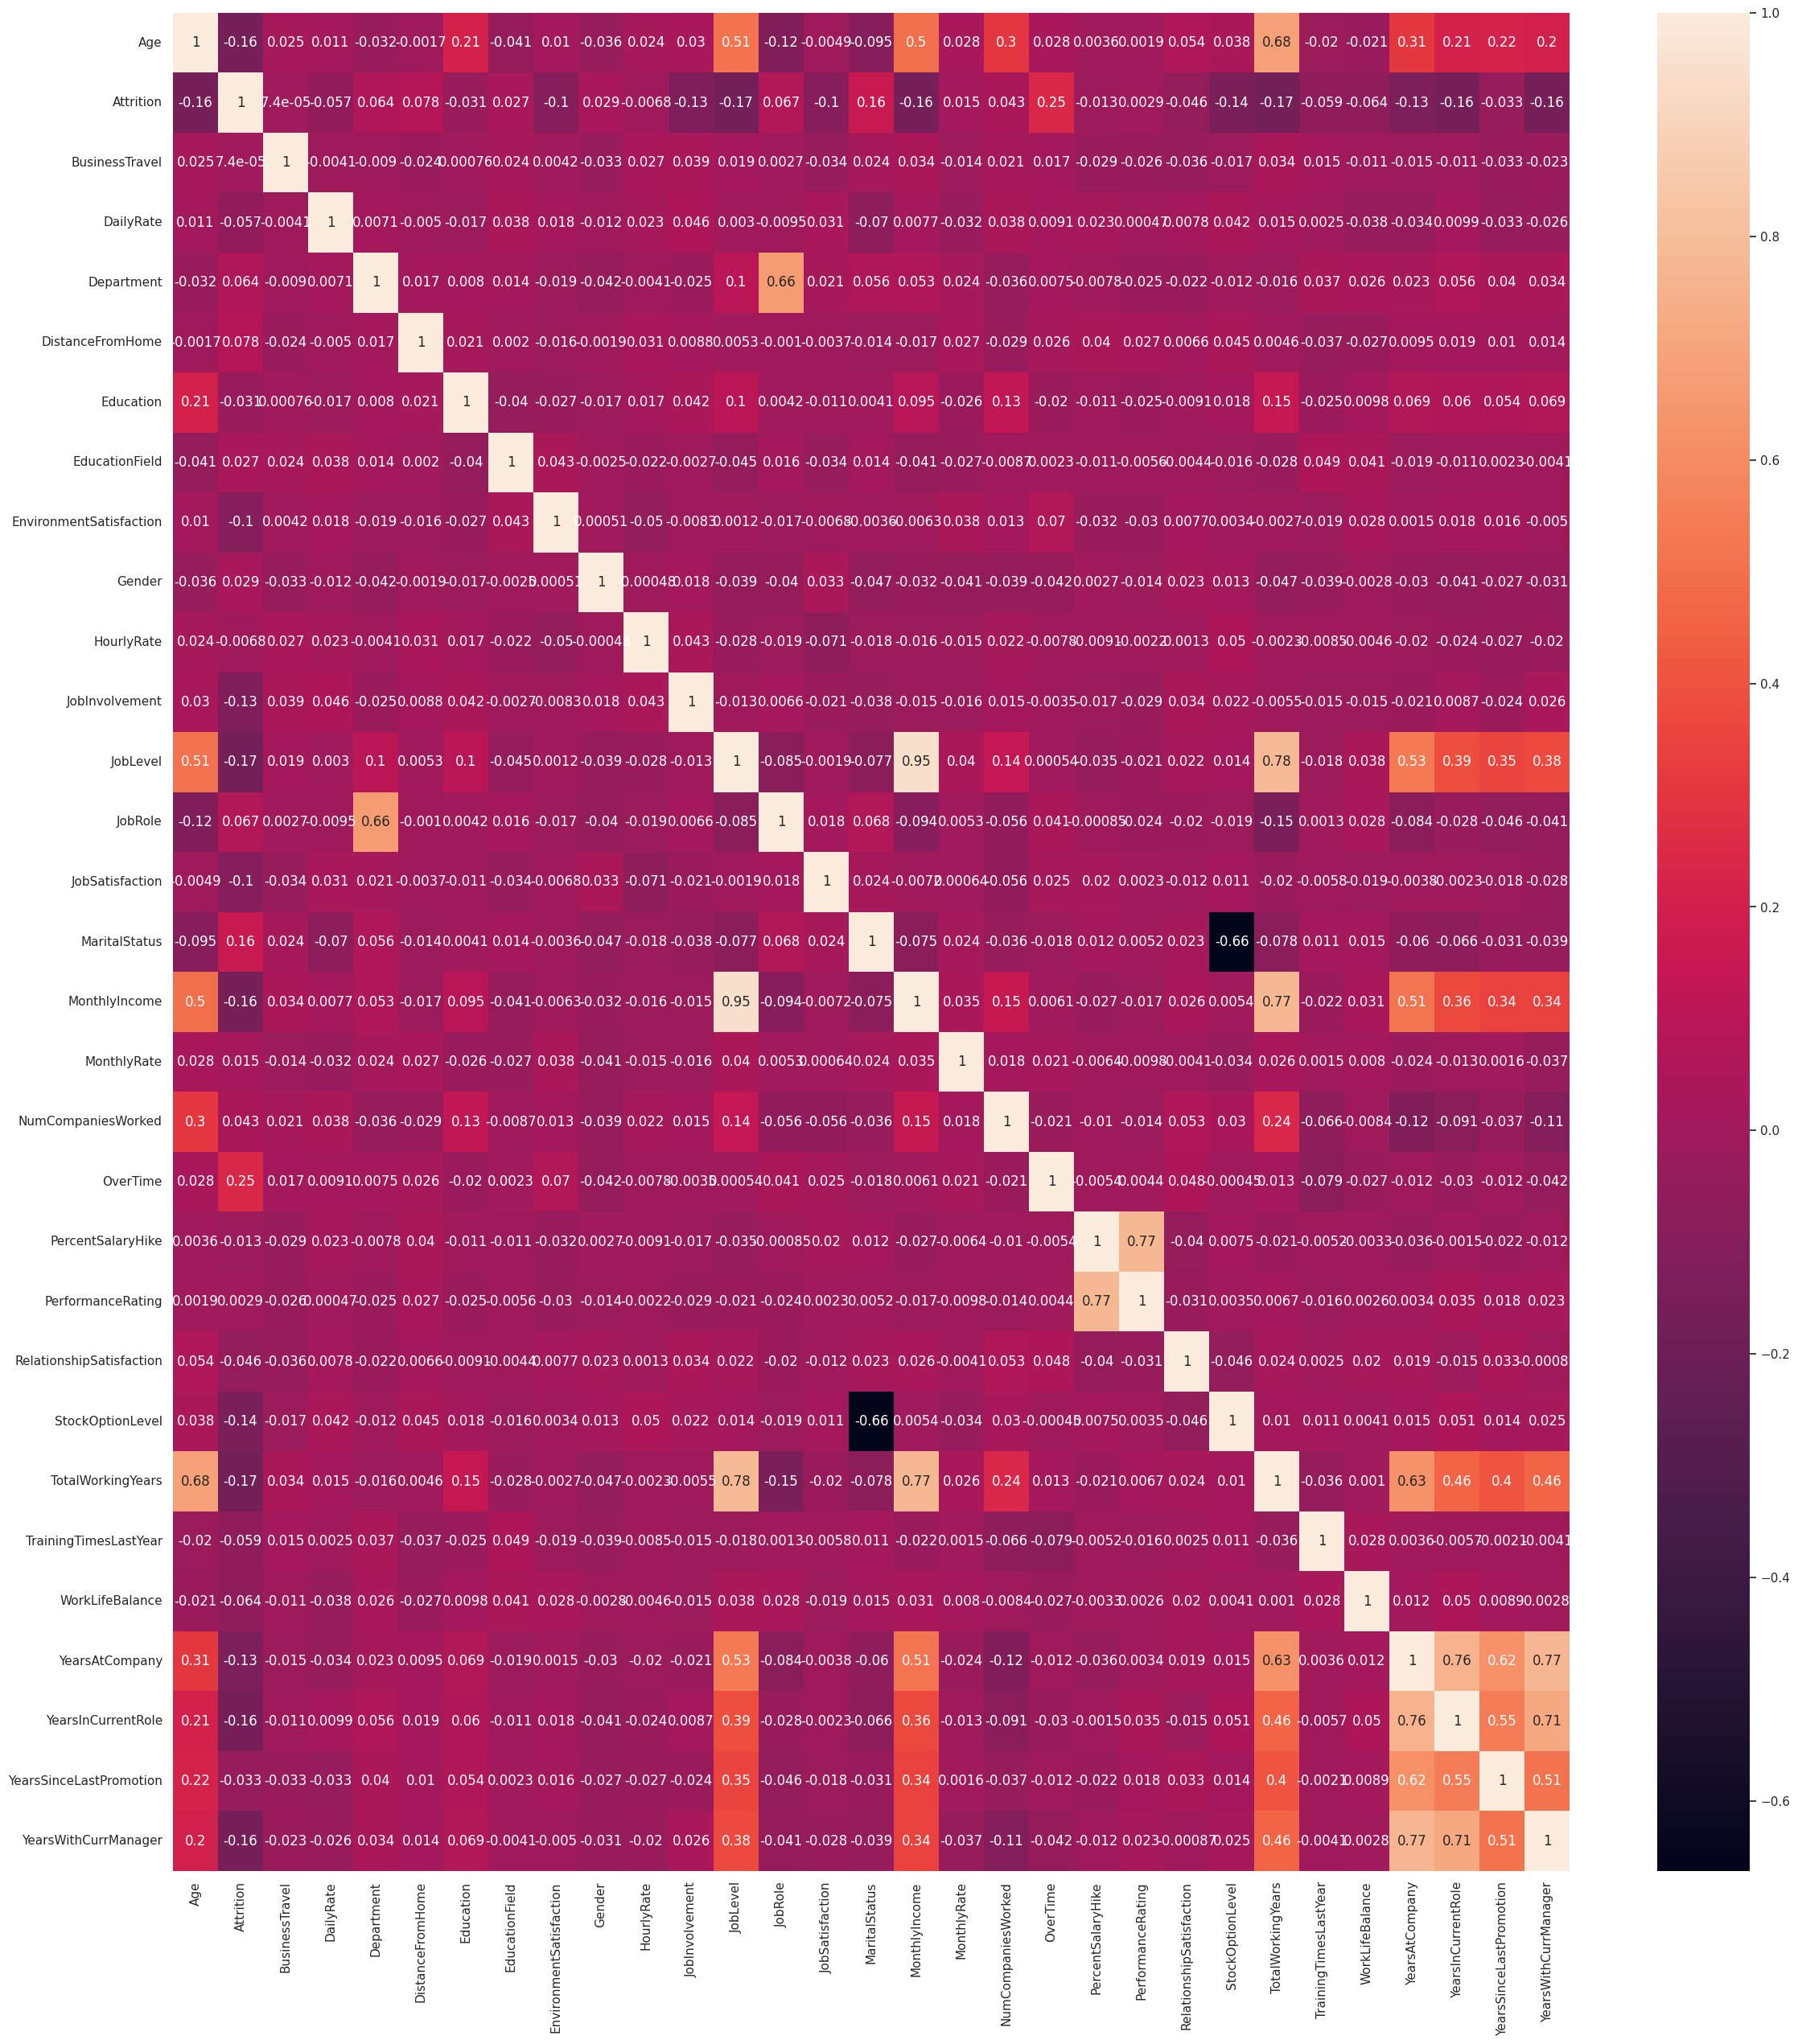

In [25]:
plt.figure(figsize=(28, 30))
sns.heatmap(df.corr(), annot=True)

In [26]:
correlation_matrix = df.corr()
target_variable = 'Attrition'
correlations_with_target = abs(correlation_matrix[target_variable]).sort_values(ascending=False)
threshold = 0.1
selected_features = correlations_with_target[correlations_with_target > threshold].index.tolist()
selected_features

['Attrition',
 'OverTime',
 'TotalWorkingYears',
 'JobLevel',
 'MaritalStatus',
 'YearsInCurrentRole',
 'MonthlyIncome',
 'Age',
 'YearsWithCurrManager',
 'StockOptionLevel',
 'YearsAtCompany',
 'JobInvolvement',
 'JobSatisfaction',
 'EnvironmentSatisfaction']

In [50]:
#chọn X, y
y=df['Attrition']
X=df[selected_features].drop(columns=['Attrition'])

In [51]:
# chuẩn hóa dữ liệu
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [52]:
# Chia thành tập train và tập test
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [53]:
# Xử lý mất cân bằng dữ liệu bằng SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Data Modeling & Evaluation

In [54]:
# Xây dựng mô hình Random Forest Classifier
model1 = RandomForestClassifier(random_state=42)
# Huấn luyện mô hình trên tập train
model1.fit(X_train, y_train)
# Dự đoán trên tập test
y_pred = model1.predict(X_test)
# Đánh giá mô hình
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.8967611336032388
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.90      0.90       250
           1       0.90      0.89      0.89       244

    accuracy                           0.90       494
   macro avg       0.90      0.90      0.90       494
weighted avg       0.90      0.90      0.90       494



In [55]:
# Xây dựng mô hình Logistic Regression
model2 = LogisticRegression(random_state=42)
# Huấn luyện mô hình trên tập huấn luyện
model2.fit(X_train, y_train)
# Dự đoán trên tập kiểm tra
y_pred = model2.predict(X_test)
# Đánh giá mô hình bằng accuracy
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.728744939271255
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.71      0.73       250
           1       0.71      0.75      0.73       244

    accuracy                           0.73       494
   macro avg       0.73      0.73      0.73       494
weighted avg       0.73      0.73      0.73       494



In [56]:
# Xây dựng mô hình KNN
knn_model = KNeighborsClassifier(n_neighbors=4)
# Huấn luyện mô hình KNN trên tập train
knn_model.fit(X_train, y_train)
# Dự đoán trên tập test bằng mô hình KNN
y_pred_knn = knn_model.predict(X_test)
# Đánh giá mô hình KNN
accuracy_knn = accuracy_score(y_test, y_pred_knn)
report_knn = classification_report(y_test, y_pred_knn)
print("Accuracy (KNN):", accuracy_knn)
print("Classification Report (KNN):\n", report_knn)

Accuracy (KNN): 0.868421052631579
Classification Report (KNN):
               precision    recall  f1-score   support

           0       0.95      0.78      0.86       250
           1       0.81      0.96      0.88       244

    accuracy                           0.87       494
   macro avg       0.88      0.87      0.87       494
weighted avg       0.88      0.87      0.87       494



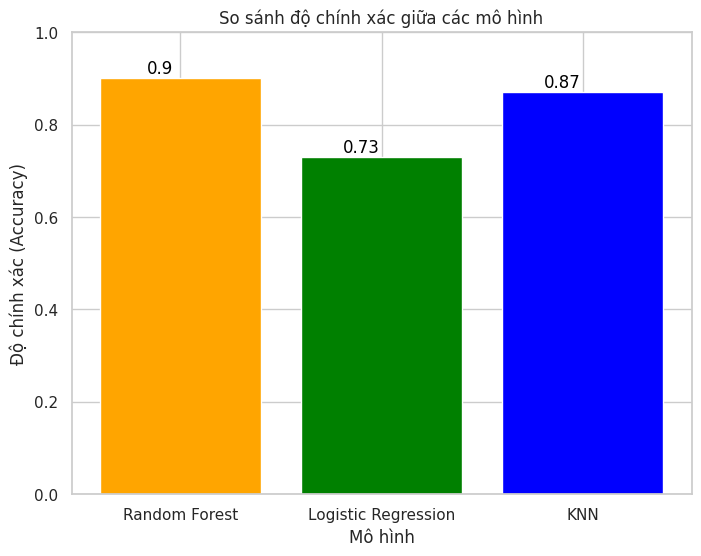

In [57]:
# Kết quả từ ba mô hình
models = ['Random Forest', 'Logistic Regression', 'KNN']
accuracy_scores = [0.9, 0.73, 0.87]
# Vẽ biểu đồ bar chart
plt.figure(figsize=(8, 6))
bars=plt.bar(models, accuracy_scores, color=['orange', 'green', 'blue'])
for bar, score in zip(bars, accuracy_scores):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, score + 0.01, str(round(score, 2)), ha='center', color='black')
plt.xlabel('Mô hình')
plt.ylabel('Độ chính xác (Accuracy)')
plt.title('So sánh độ chính xác giữa các mô hình')
plt.ylim(0, 1)
plt.show()